<font size= 5> **Predictive Analysis of Chest Pain Types: Exploring Multifactorial Influences** </font>

<font size= 4>  **Introduction** </font>

Chest pain, also known as angina, is characterized by blockages in the blood vessels leading to one’s heart. Four types of these chest pains include typical angina, atypical angina, non-anginal pain and asymptomatic. Typical angina is a substernal chest pain caused by physical exertion while atypical angina is distinguished as epigastric pain (AlBadri et.al., 2017).
 In addition, non-anginal pain is not attributed to an underlying heart disease and asymptomatic chest pain is a temporary change in blood flow to the heart without typical chest pain (Rahel et.al., 2018). Whilst different, they show overlapping symptoms, such as shortness of breath and intense pain that makes it difficult to distinguish between them. Many studies have shown that age, unhealthy eating patterns, stress and more are all accompanied by a greater risk of experiencing angina (“Causes and Risk Factors”)

To conduct a data analysis, we will first determine the correlation between our selected predictors and choose the best correlations to classify which type of chest pain is most likely to occur. A knn classification model will be created and tested for this data analysis 

The set of variables per observation in this data set is

age - the age of the patient (in years)

chest_pain_type - the chest pain type (Value 1: typical angina,  Value 2: atypical angin, Value 3: non-anginal pain, Value 4: asymptomatic

resting_bp - the resting blood pressure (in mm Hg on admission to the hospita
)
cholesterol - serum cholesterol (in mg/
l)
max_heartrate - the maximum heart rate achi
   
heart_diseathe - athdiagnosis of heart disease (angiographic disease sts)

staus)



Question: What type of chest pain is most likely to occur based on their age, resting blood sugar, maximum heart rate and presence of heart disease?


<font size= 4>  **Exploring the Dataset** </font>

In [3]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [5]:
#Loading the data into R (provided by https://archive.ics.uci.edu/dataset/45/heart+disease)

url <- "https://raw.githubusercontent.com/Kalpashree10/Group-Project/main/data/processed.hungarian.data"

hungry <- read_csv(url, col_names = c('age', 'sex', 'chest_pain_type', 'resting_bps', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease'))

hungry

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): resting_bps, cholesterol, fasting_blood_sugar, rest_ecg, max_heartr...
dbl (5): age, sex, chest_pain_type, depression, heart_disease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


<font size= 4>  **Tidying the Data** </font>


**Feature Selection Rationale for Heart Disease Dataset**


In the heart disease dataset, we have opted not to utilize sex, fasting blood sugar, resting electrocardiographic results, exercise-induced angina, depression, and thalassemia lack as they lack direct relevance in predicting the type of chest pain. Fasting blood sugar levels reflect metabolic state, but their direct link to specific types of chest pain in heart disease is unclear. Resting electrocardiographic results provide insights into heart function but do not directly correlate with the qualitative aspects of chest pain. Exercise-induced angina, depression, sex and thalassemia do not directly predict the type of chest pain associated as they lack direct physiological links to cardiac symptoms.


**Removing NA**


In this section, we have removed the missing values from our raw data set. This is because missing values can reduce the performance of our knn model and by removing them we enhance the overall quality of the data set. Here we first determined how many missing values they are, removed them using na.omit() and did a final check to confirm all missing values are now removed from the data set. Using this new clean data set the classification model can continue to be built. 


In [16]:
#Determining how many missing values there are
hungry_na <- hungry|> 
    select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease) |>
    is.na()|>
    nrow()

hungry_na

#Removing missing values 
hungry[hungry == "?"] <- NA

hungry_no_NA <- hungry |>
select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease) |> 
        na.omit()
hungry_no_NA


#Checking if any NA values remain after removal
check <- hungry_no_NA |>
            map_df(~sum(is.na(.x)))
check


[1] 294

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


**Changing variables into integers**


Here, we are changing our categorical variables into integers so that our data can be compatible with our classification algorithm. This is done by using the function as.integer. Then a tibble was created of this final clean data set so that we can use this new clean data to split into its training and testing sets.



In [5]:
#Changing the variables into integers
hungry_select <- hungry_no_NA |>
     mutate( resting_bps = as.integer(resting_bps),cholesterol = as.integer(cholesterol), max_heartrate = as.integer(max_heartrate))
hungry_select

hungry_final <- as_tibble(hungry_select)
hungry_final

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮
56,4,155,342,150,1
58,2,180,393,110,1
65,4,130,275,115,1


<font size= 4>  **Visualization** </font>

**Splitting data**


In this section, we have split our data sets into training and testing data sets using the predictors we want to investigate a relationship for from hungry_select. This is so we can determine if our KNN classification model can properly evaluate unseen data by training it using our training set. Our KNN classification model will be first built upon this training set and then later evaluated using the testing set where a data analysis will be performed. 



In [14]:
#Splitting the data sets into training and testing 
set.seed(1234)


hungry_split <- initial_split(hungry_final, prop = 3/4, strata = chest_pain_type)
hungry_training_2 <- training(hungry_split)
hungry_testing_2 <- testing(hungry_split)


hungry_training_2
hungry_testing_2

age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
28,2,130,132,185,0
29,2,120,243,160,0
31,2,100,219,150,0
⋮,⋮,⋮,⋮,⋮,⋮
50,4,140,231,140,1
52,4,160,331,94,1
65,4,130,275,115,1


age,chest_pain_type,resting_bps,cholesterol,max_heartrate,heart_disease
<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
30,1,170,237,170,0
35,1,120,160,185,0
35,2,150,264,168,0
⋮,⋮,⋮,⋮,⋮,⋮
52,4,140,266,134,1
56,4,155,342,150,1
58,2,180,393,110,1


**Correlation between the predictors and ggpairs Visualization**


Here we have used ggpairs to create a pairplot of all the columns we are interested in including in our model from our training set. Using this pairplot we can determine the correlation between are chosen predictors and determine if there are any relevant relationships that we can look more into. From the classifier, interesting relationships can be noticed in max_heartrate, resting_bps, age and cholesterol. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


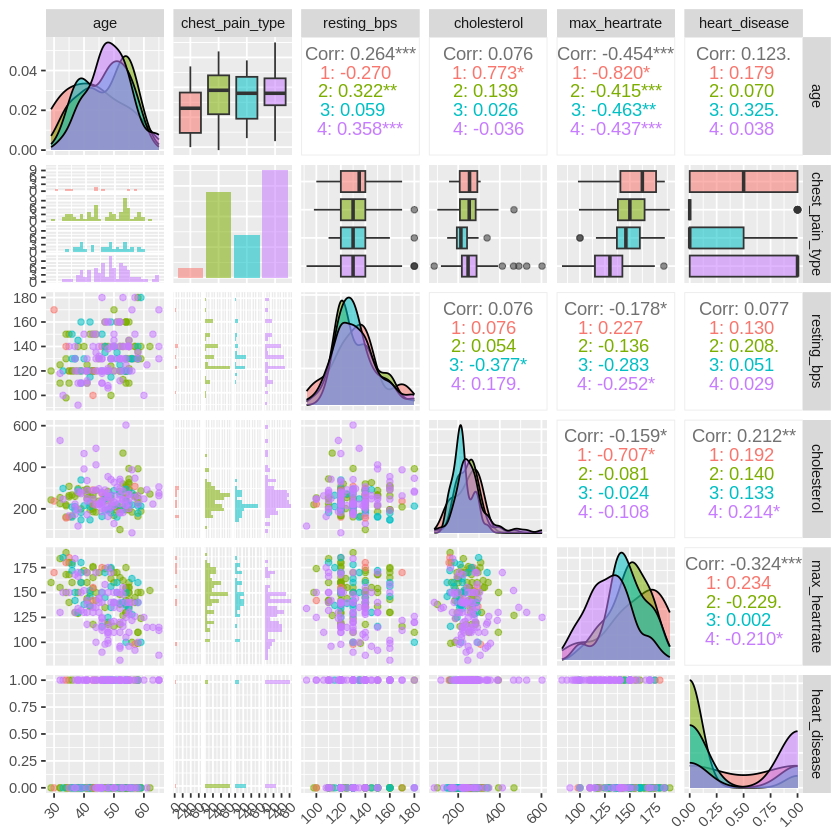

In [13]:
#Determining the correlation between predictors

data_ggpair <- hungry_training_2 |>
                    select(age, chest_pain_type, resting_bps, cholesterol, max_heartrate, heart_disease)

data_ggpair$chest_pain_type = as.factor(data_ggpair$chest_pain_type)

plot <- ggpairs(data_ggpair, aes(color = chest_pain_type, alpha = 0.5), cardinality_threshold = NULL, progress = FALSE) +
                        theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot

<font size= 4>  **Methods and Results** </font>

If we take a look a closer look at the ggpair graphs we notice an interesting correlation with the predictor's max heart rate, resting bps, age and cholesterol. For instance, from the histograms, we can notice correlations between these predictors and chest pain type where certain predictors are more prominent in types 4 and types 3 and not as common in types 1 and 2. Thus, based on these correlations it would be beneficial to further investigate the role these 4 predictors play on chest pain types by building a knn classification model.


**How can the presence of heart disease used to explain chest pain type**

The presence of heart disease, notably coronary artery disease (CAD), can elucidate the various types of chest pain experienced. Angina, characterized by chest discomfort, often arises due to narrowed arteries impeding blood flow to the heart muscle, causing inadequate oxygen supply. As CAD progresses, complications like heart attacks occur, wherein complete blockage of blood flow to a segment of the heart leads to severe chest pain, along with symptoms like weakness, nausea, sweating, and pain radiating to the arms or shoulder. Additionally, CAD's advancement can result in heart failure, where the weakened heart muscle's inability to pump blood effectively triggers symptoms such as shortness of breath, fatigue, and swelling. Thus, the presence and progression of heart disease contribute to a spectrum of chest pain types, reflecting the evolving nature and severity of the conditio

Reference - 
https://www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Angina%2C%20or%20chest%20pain%20and,the%20rest%20of%20your%20body. 
el.




<font size= 4>  **Discussion** </font>

**What do you expect to find?**

Predicting chest pain types in heart disease patients could lead to better diagnosis and care, as well as more targeted interventions and improved long-term outcomes. It may also uncover new insights into the mechanisms behind chest pain, aiding in the discovery of therapeutic targets and predictive markers. 


**What impact could such findings have?**

The findings from predicting chest pain types can lead to more personalized and effective care strategies, benefiting patients across diverse demographics, including those who are non-verbal by optimizing treatment approaches.


**What future questions could this lead to?**

Understanding how different types of chest pain correlate with specific heart conditions can lead to insights into the underlying mechanisms of various cardiac diseases. Further investigation could focus on developing targeted interventions based on the type of chest pain observed in individual patients. 


<font size= 4>  **References** </font>

https://www.healthline.com/health/chest-pain#causes 



https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106/#:~:text=Typical%20angina%20(TA)%20is%20defined,relieved%20with%20rest%20or%20nitroglycerin. 


https://www.ahajournals.org/doi/full/10.1161/JAHA.119.0155
9

 
https://openheart.bmj.com/content/5/2/e000
5

9 
https://pubmed.ncbi.nlm.nih.gov/2238747/#:~:text=Silent%20(asymptomatic)%20myocardial%20ischemi
a

%20
https://www.nhlbi.nih.gov/health/angina/causes 
